In [1]:
import numpy as np
import pandas as pd
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

#from sklearn.datasets import load_boston

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import skew, boxcox, shapiro, kstest, normaltest

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
banglore_df = pd.read_csv(r'csv_files/Bengaluru_House_Data.csv')
df = banglore_df.copy()
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df = df.drop_duplicates(keep = 'first')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [4]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9227,Super built-up Area,Ready To Move,KUDLU MAIN ROAD,2 BHK,NaN,1464,2.0,2.0,56.0
12318,Built-up Area,Ready To Move,Pai Layout,2 BHK,NaN,1068,2.0,3.0,48.0
7376,Plot Area,Ready To Move,HAL 2nd Stage,3 Bedroom,NaN,2700,3.0,0.0,500.0
12815,Super built-up Area,Ready To Move,Kodichikkanahalli,2 BHK,NaN,900,2.0,1.0,35.0
3210,Super built-up Area,21-Feb,Kanakpura Road,3 BHK,NaN,2265,3.0,2.0,136.0
11261,Super built-up Area,Ready To Move,Sarjapur Road,2 BHK,VHinoel,1113,2.0,1.0,44.5
9818,Super built-up Area,Ready To Move,Seegehalli,3 BHK,Niowshi,1683,3.0,3.0,80.0
6116,Super built-up Area,Ready To Move,Arekempanahalli,3 BHK,NaN,1537,3.0,2.0,110.0
10774,Built-up Area,Ready To Move,Ramanjaneyanagar,4 Bedroom,NaN,2200,3.0,1.0,225.0
8698,Built-up Area,Ready To Move,Hennur,4 BHK,NaN,2502,4.0,2.0,170.0


In [5]:
df.rename({'size':'bhk'}, axis = 1, inplace=True)
df

,area_type,availability,location,bhk,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [6]:
for col in df.columns:
    print(col)
    print()
    print(df[col].value_counts())
    print("*"*100)

area_type

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64
****************************************************************************************************
availability

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
****************************************************************************************************
location

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th

In [7]:
df.corr()

,bath,balcony,price
bath,1.000000,0.200387,0.453099
balcony,0.200387,1.000000,0.118645
price,0.453099,0.118645,1.000000


In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
bhk               16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [9]:
df = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12790 non-null  object 
 1   bhk         12775 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12718 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


In [11]:
df.describe()

,bath,price
count,12718.000000,12791.000000
mean,2.708602,114.317646
std,1.357764,151.480310
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,73.000000
75%,3.000000,121.000000
max,40.000000,3600.000000


In [12]:
df.isna().sum()

location       1
bhk           16
total_sqft     0
bath          73
price          0
dtype: int64

## bhk

In [13]:
df[df['bhk'].isna()]

,location,bhk,total_sqft,bath,price
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
1775,IVC Road,NaN,2000 - 5634,NaN,124.000
2264,Banashankari,NaN,2400,NaN,460.000
2809,Sarjapur Road,NaN,1200 - 2400,NaN,28.785
2862,Devanahalli,NaN,1500 - 2400,NaN,46.800
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115
6423,Whitefield,NaN,2324,NaN,26.730
6636,Jigani,NaN,1500,NaN,25.490
6719,Hoskote,NaN,800 - 2660,NaN,28.545
7680,Kasavanhalli,NaN,5000,NaN,400.000


In [14]:
df = df[~df['bhk'].isna()]

In [15]:
df.loc[df['bhk'].str.contains(r"\d")]

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [16]:
df['bhk'] = df['bhk'].str.extract(pat= r"([\d]+)").astype(int)
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: bhk, Length: 12775, dtype: int32

In [17]:
df['bhk'].value_counts()

2     5245
3     4655
4     1398
1      638
5      350
6      221
7       99
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [18]:
df[df['bhk']>10].index

Int64Index([459, 1718, 1768, 3379, 3609, 3853, 4684, 4916, 6533, 7979, 9935,
            11559],
           dtype='int64')

In [19]:
banglore_df.loc[df[df['bhk']>7].index]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,NaN,600,9.0,NaN,200.0
64,Built-up Area,Ready To Move,Bommanahalli,8 Bedroom,NaN,3000,8.0,0.0,140.0
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,NaN,1350,7.0,0.0,85.0
140,Built-up Area,Ready To Move,Hennur Road,8 Bedroom,NaN,5000,8.0,NaN,250.0
241,Plot Area,Ready To Move,Mukkutam Nagar,8 Bedroom,NaN,2600,8.0,2.0,180.0
...,...,...,...,...,...,...,...,...,...
13141,Built-up Area,Ready To Move,Medahalli,9 BHK,NaN,4600,9.0,NaN,150.0
13187,Built-up Area,Ready To Move,Chikkabanavar,8 Bedroom,NaN,4000,7.0,0.0,110.0
13198,Plot Area,Ready To Move,Pattegarhpalya,8 Bedroom,NaN,1200,8.0,0.0,140.0
13221,Plot Area,Ready To Move,T Dasarahalli,9 Bedroom,NaN,1178,9.0,1.0,75.0


<AxesSubplot: >

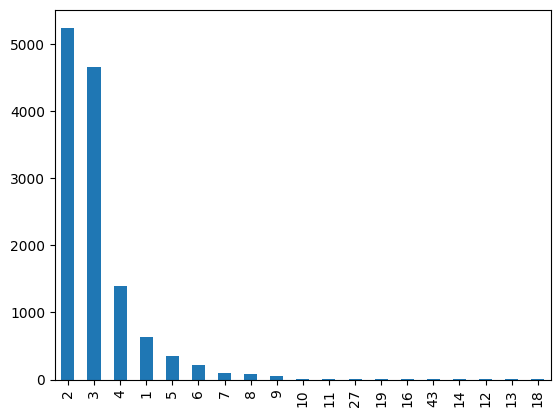

In [20]:
df['bhk'].value_counts().plot(kind='bar')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12775 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12774 non-null  object 
 1   bhk         12775 non-null  int32  
 2   total_sqft  12775 non-null  object 
 3   bath        12718 non-null  float64
 4   price       12775 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 548.9+ KB


## total_sqft

In [22]:
df['total_sqft'].sample(10)

8013     1760
8857     1225
3509     2400
1958     1020
11934     614
1747     1000
6662     1500
109      1260
5798     1253
13194    1291
Name: total_sqft, dtype: object

In [23]:
df[df['total_sqft'].str.contains(r"[-]")]

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
56,Devanahalli,4,3010 - 3410,NaN,192.000
81,Hennur Road,4,2957 - 3450,NaN,224.500
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13240,Devanahalli,1,1020 - 1130,NaN,52.570


In [24]:
df[df['total_sqft'].str.contains(r"[-]")]['total_sqft'].str.split('-')

30       [2100 ,  2850]
56       [3010 ,  3410]
81       [2957 ,  3450]
122      [3067 ,  8156]
137      [1042 ,  1105]
              ...      
12975     [850 ,  1060]
12990    [1804 ,  2273]
13059    [1200 ,  1470]
13240    [1020 ,  1130]
13265    [1133 ,  1384]
Name: total_sqft, Length: 192, dtype: object

In [25]:
index_list = df[df['total_sqft'].str.contains(r"[-]")].index

In [26]:
x = df['total_sqft'].loc[index_list].str.split('-')
x

30       [2100 ,  2850]
56       [3010 ,  3410]
81       [2957 ,  3450]
122      [3067 ,  8156]
137      [1042 ,  1105]
              ...      
12975     [850 ,  1060]
12990    [1804 ,  2273]
13059    [1200 ,  1470]
13240    [1020 ,  1130]
13265    [1133 ,  1384]
Name: total_sqft, Length: 192, dtype: object

In [27]:
df['total_sqft'].loc[index_list] = np.ceil((x.str[0].str.strip().astype(float) + x.str[1].str.strip().astype(float))/2).astype(str)
df.loc[index_list]

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2475.0,4.0,186.000
56,Devanahalli,4,3210.0,NaN,192.000
81,Hennur Road,4,3204.0,NaN,224.500
122,Hebbal,4,5612.0,4.0,477.000
137,8th Phase JP Nagar,2,1074.0,2.0,54.005
...,...,...,...,...,...
12975,Whitefield,2,955.0,2.0,38.190
12990,Talaghattapura,3,2039.0,3.0,122.000
13059,Harlur,2,1335.0,2.0,72.760
13240,Devanahalli,1,1075.0,NaN,52.570


In [28]:
df

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3,1715,3.0,112.00
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00


In [29]:
df[df['total_sqft'].str.contains(r'[a-zA-Z]')]

,location,bhk,total_sqft,bath,price
410,Kengeri,1,34.46Sq. Meter,1.0,18.50
648,Arekere,9,4125Perch,9.0,265.00
775,Basavanagara,1,1000Sq. Meter,2.0,93.00
872,Singapura Village,2,1100Sq. Yards,2.0,45.00
1019,Marathi Layout,1,5.31Acres,1.0,110.00
1086,Narasapura,2,30Acres,2.0,29.50
1400,Chamrajpet,9,716Sq. Meter,9.0,296.00
1712,Singena Agrahara,3,1500Sq. Meter,3.0,95.00
1743,Hosa Road,3,142.61Sq. Meter,3.0,115.00
1821,Sarjapur,3,1574Sq. Yards,3.0,76.00


In [30]:
df = df[~df['total_sqft'].str.contains(r'[a-zA-Z]')]
df['total_sqft'] = df['total_sqft'].astype(float)
df

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,112.00
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12729 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12728 non-null  object 
 1   bhk         12729 non-null  int32  
 2   total_sqft  12729 non-null  float64
 3   bath        12672 non-null  float64
 4   price       12729 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 546.9+ KB


## Bath

In [32]:
df['bath'].isna().sum()

57

In [33]:
df = df[~df['bath'].isna()]
df

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,112.00
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12672 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12671 non-null  object 
 1   bhk         12672 non-null  int32  
 2   total_sqft  12672 non-null  float64
 3   bath        12672 non-null  float64
 4   price       12672 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 544.5+ KB


In [35]:
df.corr()

,bhk,total_sqft,bath,price
bhk,1.000000,0.342759,0.898922,0.393706
total_sqft,0.342759,1.000000,0.389166,0.572786
bath,0.898922,0.389166,1.000000,0.452745
price,0.393706,0.572786,0.452745,1.000000


## location

In [36]:
df[df['location'].isna()]

,location,bhk,total_sqft,bath,price
568,NaN,3,1600.0,3.0,86.0


In [37]:
df['location'].value_counts()

Whitefield           515
Sarjapur  Road       372
Electronic City      287
Kanakpura Road       240
Thanisandra          227
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1298, dtype: int64

In [38]:
df['location'].mode()[0]

'Whitefield'

In [39]:
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [40]:
df[df['location'].isna()]

,location,bhk,total_sqft,bath,price


In [41]:
df['location'].value_counts()

Whitefield           516
Sarjapur  Road       372
Electronic City      287
Kanakpura Road       240
Thanisandra          227
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1298, dtype: int64

In [42]:
df['location'] = df['location'].str.upper().str.strip().str.replace(r'\s+'," ")

In [43]:
df['location'].value_counts()

WHITEFIELD                            517
SARJAPUR ROAD                         372
ELECTRONIC CITY                       289
KANAKPURA ROAD                        240
THANISANDRA                           230
                                     ... 
RAJANNA LAYOUT                          1
KENGERI SATELLITE TOWN ( BDA SITE)      1
LAKSHMIPURA VIDYAANYAPURA               1
MALUR HOSUR ROAD                        1
ABSHOT LAYOUT                           1
Name: location, Length: 1275, dtype: int64

In [44]:
# we are renaming locations to 'OTHER' whose count is less than 10

In [45]:
dict1 = df['location'].value_counts().to_dict()

list1 = []

for location, houses in dict1.items():
    if houses < 10:
        list1.append(location)
        
# print(list1)

In [46]:
df[df['location'].isin(list1)]

,location,bhk,total_sqft,bath,price
9,GANDHI BAZAR,6,1020.0,6.0,370.00
18,RAMAKRISHNAPPA LAYOUT,3,2770.0,4.0,290.00
19,MANAYATA TECH PARK,2,1100.0,2.0,48.00
25,MANGAMMANAPALYA,3,1250.0,3.0,56.00
49,HIMAGIRI MEADOWS,2,869.0,2.0,36.00
...,...,...,...,...,...
13291,WEAVERS COLONY,1,812.0,1.0,26.00
13292,UDAYAPUR VILLAGE,3,1440.0,2.0,63.93
13302,ANNAIAH REDDY LAYOUT,2,1075.0,2.0,48.00
13306,RAJARAJESHWARI NAGARA,4,1200.0,5.0,325.00


In [47]:
df['location'] = df['location'].apply(lambda x : 'OTHER' if x in list1 else x)

In [48]:
df['location'].value_counts()

OTHER              2740
WHITEFIELD          517
SARJAPUR ROAD       372
ELECTRONIC CITY     289
KANAKPURA ROAD      240
                   ... 
NARAYANAPURA         10
NAGANATHAPURA        10
SADASHIVA NAGAR      10
DAIRY CIRCLE         10
NAGADEVANAHALLI      10
Name: location, Length: 251, dtype: int64

In [49]:
sorted(df['location'].str.upper().str.extract(pat = '([\D]+)').value_counts().to_dict().items())

[(('ABBIGERE',), 22),
 (('AECS LAYOUT',), 12),
 (('AKSHAYA NAGAR',), 61),
 (('AMBALIPURA',), 26),
 (('AMBEDKAR NAGAR',), 29),
 (('AMRUTHAHALLI',), 24),
 (('ANANDAPURA',), 27),
 (('ANANTH NAGAR',), 29),
 (('ANEKAL',), 30),
 (('ANJANAPURA',), 16),
 (('ARDENDALE',), 23),
 (('AREKERE',), 16),
 (('ATTIBELE',), 41),
 (('BABUSAPALAYA',), 25),
 (('BALAGERE',), 44),
 (('BANASHANKARI',), 71),
 (('BANASHANKARI STAGE II',), 16),
 (('BANASHANKARI STAGE III',), 25),
 (('BANASHANKARI STAGE V',), 12),
 (('BANASHANKARI STAGE VI',), 16),
 (('BANASWADI',), 17),
 (('BANJARA LAYOUT',), 11),
 (('BANNERGHATTA',), 17),
 (('BANNERGHATTA ROAD',), 148),
 (('BASAVANGUDI',), 31),
 (('BASAVESHWARA NAGAR',), 21),
 (('BATTARAHALLI',), 24),
 (('BEGUR',), 16),
 (('BEGUR ROAD',), 74),
 (('BELLANDUR',), 93),
 (('BEML LAYOUT',), 10),
 (('BENSON TOWN',), 15),
 (('BHARATHI NAGAR',), 12),
 (('BHOGANHALLI',), 42),
 (('BILLEKAHALLI',), 18),
 (('BINNY PETE',), 19),
 (('BISUVANAHALLI',), 42),
 (('BOMMANAHALLI',), 34),
 (('BOMMAS

In [50]:
# We have multiple name for same area, like for anandpura, anandpuram, anantpuram
# kothannur, kothanur

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12672 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12672 non-null  object 
 1   bhk         12672 non-null  int32  
 2   total_sqft  12672 non-null  float64
 3   bath        12672 non-null  float64
 4   price       12672 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 544.5+ KB


In [52]:
df.describe()

,bhk,total_sqft,bath,price
count,12672.000000,12672.000000,12672.000000,12672.000000
mean,2.814946,1565.162983,2.707150,114.030494
std,1.309769,1258.837111,1.355174,151.710789
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1280.000000,2.000000,73.000000
75%,3.000000,1685.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


## Outliers

In [53]:
df['price_per_sqft'] = df['price']*1e5/df['total_sqft']
df

,location,bhk,total_sqft,bath,price,price_per_sqft
0,ELECTRONIC CITY PHASE II,2,1056.0,2.0,39.07,3699.810606
1,CHIKKA TIRUPATHI,4,2600.0,5.0,120.00,4615.384615
2,UTTARAHALLI,3,1440.0,2.0,62.00,4305.555556
3,LINGADHEERANAHALLI,3,1521.0,3.0,95.00,6245.890861
4,KOTHANUR,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13314,GREEN GLEN LAYOUT,3,1715.0,3.0,112.00,6530.612245
13315,WHITEFIELD,5,3453.0,4.0,231.00,6689.834926
13316,OTHER,4,3600.0,5.0,400.00,11111.111111
13317,RAJA RAJESHWARI NAGAR,2,1141.0,2.0,60.00,5258.545136


### bhk

In [54]:
df['bhk'].skew()

4.84657927088278

<AxesSubplot: xlabel='bhk'>

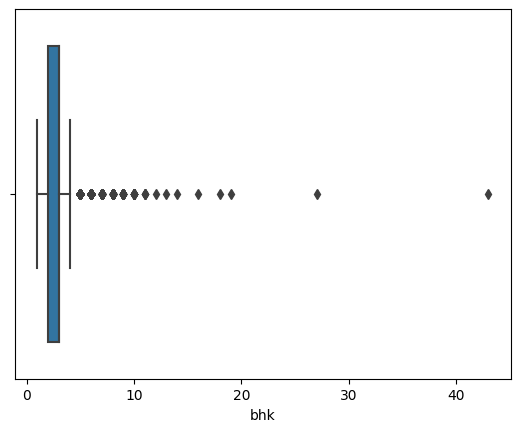

In [55]:
sns.boxplot(x = df['bhk'])

In [56]:
Q1 = df['bhk'].quantile(0.25)
Q3 = df['bhk'].quantile(0.75)

IQR = Q3-Q1
upper_tail = Q3 + 3*IQR
print(upper_tail)

df[df['bhk']>upper_tail]['bhk'].value_counts().sum()

6.0


265

In [57]:
df['bhk'].value_counts()

2     5234
3     4617
4     1371
1      622
5      343
6      220
7       99
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

### total_sqft

In [58]:
df['total_sqft'].skew()

15.197989333365578

<AxesSubplot: xlabel='total_sqft'>

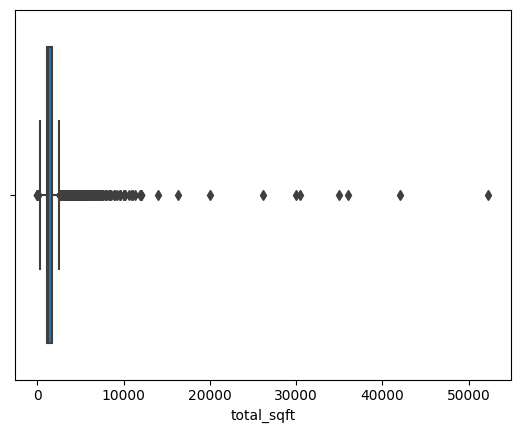

In [59]:
sns.boxplot(x = df['total_sqft'])

In [60]:
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)

IQR = Q3-Q1
upper_tail = Q3 + 3*IQR
print(upper_tail)

df[df['total_sqft']>upper_tail]['total_sqft'].value_counts().sum()

3440.0


567

In [61]:
df = df[df['total_sqft']>300]
df

,location,bhk,total_sqft,bath,price,price_per_sqft
0,ELECTRONIC CITY PHASE II,2,1056.0,2.0,39.07,3699.810606
1,CHIKKA TIRUPATHI,4,2600.0,5.0,120.00,4615.384615
2,UTTARAHALLI,3,1440.0,2.0,62.00,4305.555556
3,LINGADHEERANAHALLI,3,1521.0,3.0,95.00,6245.890861
4,KOTHANUR,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13314,GREEN GLEN LAYOUT,3,1715.0,3.0,112.00,6530.612245
13315,WHITEFIELD,5,3453.0,4.0,231.00,6689.834926
13316,OTHER,4,3600.0,5.0,400.00,11111.111111
13317,RAJA RAJESHWARI NAGAR,2,1141.0,2.0,60.00,5258.545136


### bath

In [62]:
df['bath'].skew()

4.233695075631585

<AxesSubplot: xlabel='bath'>

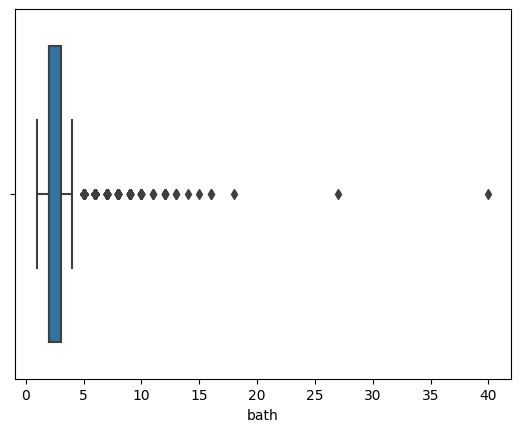

In [63]:
sns.boxplot(x = df['bath'])

In [64]:
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)

IQR = Q3-Q1
upper_tail = Q3 + 3*IQR
print(upper_tail)

df[df['bath']>upper_tail]['bath'].value_counts().sum()

6.0


238

In [65]:
#####################################################################################################

In [66]:
# We are removing outliers on the basis of upper tail

In [67]:
df[(df['bath']<7) & (df['total_sqft']<3500) & (df['bhk']<7)].sample(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
1262,HOSAKEREHALLI,4,3024.0,5.0,248.0,8201.058201
1050,IBLUR VILLAGE,3,3235.0,3.0,235.0,7264.296754
8744,HAL 2ND STAGE,4,2400.0,4.0,650.0,27083.333333
1121,THANISANDRA,2,1100.0,2.0,38.0,3454.545455
5659,6TH PHASE JP NAGAR,1,600.0,1.0,75.0,12500.000000
9999,CHIKKABANAVAR,5,2400.0,4.0,97.0,4041.666667
4250,KOTHANUR,3,1462.0,3.0,71.0,4856.361149
10593,MARATHAHALLI,4,3090.0,4.0,350.0,11326.860841
7454,CHANNASANDRA,4,1800.0,4.0,300.0,16666.666667
6331,THANISANDRA,2,1185.0,2.0,44.0,3713.080169


In [68]:
df[(df['bath']<7) & (df['total_sqft']<3500) & (df['bhk']<7)].describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000
mean,2.630164,1397.919784,2.508262,94.656342,6473.973076
std,0.901830,531.655301,0.940014,86.164086,4292.958130
min,1.000000,302.000000,1.000000,9.000000,500.000000
25%,2.000000,1093.000000,2.000000,49.000000,4258.918009
50%,3.000000,1255.000000,2.000000,69.605000,5357.142857
75%,3.000000,1601.750000,3.000000,109.000000,7058.823529
max,6.000000,3496.000000,6.000000,2250.000000,176470.588235


In [69]:
df[(df['bath']<7) & (df['total_sqft']<3500) & (df['bhk']<7)].shape

(11862, 6)

In [70]:
df1 = df[(df['bath']<7) & (df['total_sqft']<3500) & (df['bhk']<7)].drop('price_per_sqft', axis = 1)
df1

,location,bhk,total_sqft,bath,price
0,ELECTRONIC CITY PHASE II,2,1056.0,2.0,39.07
1,CHIKKA TIRUPATHI,4,2600.0,5.0,120.00
2,UTTARAHALLI,3,1440.0,2.0,62.00
3,LINGADHEERANAHALLI,3,1521.0,3.0,95.00
4,KOTHANUR,2,1200.0,2.0,51.00
...,...,...,...,...,...
13310,RACHENAHALLI,2,1050.0,2.0,52.71
13312,BELLANDUR,2,1262.0,2.0,47.00
13314,GREEN GLEN LAYOUT,3,1715.0,3.0,112.00
13315,WHITEFIELD,5,3453.0,4.0,231.00


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11862 entries, 0 to 13317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11862 non-null  object 
 1   bhk         11862 non-null  int32  
 2   total_sqft  11862 non-null  float64
 3   bath        11862 non-null  float64
 4   price       11862 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 509.7+ KB


In [72]:
df1.describe()

,bhk,total_sqft,bath,price
count,11862.000000,11862.000000,11862.000000,11862.000000
mean,2.630164,1397.919784,2.508262,94.656342
std,0.901830,531.655301,0.940014,86.164086
min,1.000000,302.000000,1.000000,9.000000
25%,2.000000,1093.000000,2.000000,49.000000
50%,3.000000,1255.000000,2.000000,69.605000
75%,3.000000,1601.750000,3.000000,109.000000
max,6.000000,3496.000000,6.000000,2250.000000


In [73]:
df1.corr()

,bhk,total_sqft,bath,price
bhk,1.000000,0.544851,0.841649,0.497531
total_sqft,0.544851,1.000000,0.605468,0.639300
bath,0.841649,0.605468,1.000000,0.542001
price,0.497531,0.639300,0.542001,1.000000


In [74]:
df1['location'].value_counts()

OTHER                 2465
WHITEFIELD             472
SARJAPUR ROAD          346
ELECTRONIC CITY        287
KANAKPURA ROAD         239
                      ... 
MAHALAKSHMI LAYOUT       8
DODSWORTH LAYOUT         6
CUNNINGHAM ROAD          6
DAIRY CIRCLE             6
SADASHIVA NAGAR          3
Name: location, Length: 251, dtype: int64

## MODEL

In [75]:
x = df1.drop('price', axis =1)
y = df1['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=900)

In [76]:
ohe = OneHotEncoder()
ohe.fit(df1[['location']])
# ohe.categories_

OneHotEncoder()

In [77]:
col_trans = ColumnTransformer(transformers=
            [('nominal', OneHotEncoder(categories=ohe.categories_, sparse=False, drop='if_binary'), ['location'])],
             remainder= 'passthrough')

In [78]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(col_trans, lin_reg)
lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[array(['1ST BLOCK JAYANAGAR', '1ST BLOCK KORAMANGALA',
       '1ST PHASE JP NAGAR', '2ND STAGE NAGARBHAVI',
       '5TH BLOCK HBR LAYOUT', '5TH PHASE JP NAGAR', '6TH PHASE JP NAGAR',
       '7TH PHASE JP NAGAR', '8TH PHASE JP NAGAR', '9TH PHASE JP NAGAR',
       'ABBIGERE', 'AECS LAYOUT...
       'THUBARAHALLI', 'THYAGARAJA NAGAR', 'TINDLU', 'TUMKUR ROAD',
       'ULSOOR', 'UTTARAHALLI', 'VARTHUR', 'VARTHUR ROAD', 'VASANTHAPURA',
       'VIDYARANYAPURA', 'VIJAYANAGAR', 'VISHVESHWARYA LAYOUT',
       'VISHWAPRIYA LAYOUT', 'VITTASANDRA', 'WHITEFIELD',
       'YELACHENAHALLI', 'YELAHANKA', 'YELAHANKA NEW TOWN', 'YELENAHALLI',
       'YESHWANTHPUR'], dtype=object)],
                                                                drop='if_binary',
                                                                sparse=False),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [79]:
lin_reg_pipe.score(x_train, y_train)

0.5589047935695255

In [80]:
lin_reg_pipe.score(x_test, y_test)

0.5099338051491809

## Model 2

In [81]:
df

,location,bhk,total_sqft,bath,price,price_per_sqft
0,ELECTRONIC CITY PHASE II,2,1056.0,2.0,39.07,3699.810606
1,CHIKKA TIRUPATHI,4,2600.0,5.0,120.00,4615.384615
2,UTTARAHALLI,3,1440.0,2.0,62.00,4305.555556
3,LINGADHEERANAHALLI,3,1521.0,3.0,95.00,6245.890861
4,KOTHANUR,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13314,GREEN GLEN LAYOUT,3,1715.0,3.0,112.00,6530.612245
13315,WHITEFIELD,5,3453.0,4.0,231.00,6689.834926
13316,OTHER,4,3600.0,5.0,400.00,11111.111111
13317,RAJA RAJESHWARI NAGAR,2,1141.0,2.0,60.00,5258.545136


In [82]:
df5 = df.copy()

In [83]:
# sqft area of a house should be greater than 300sqft for every BHK

# 1bhk = 300sqft +
# 2bhk = 600sqft +

In [84]:
df.total_sqft/df.bhk

0         528.000000
1         650.000000
2         480.000000
3         507.000000
4         600.000000
            ...     
13314     571.666667
13315     690.600000
13316     900.000000
13317     570.500000
13318    1172.250000
Length: 12660, dtype: float64

In [85]:
df[df.total_sqft/df.bhk<300]

,location,bhk,total_sqft,bath,price,price_per_sqft
9,OTHER,6,1020.0,6.0,370.0,36274.509804
45,HSR LAYOUT,8,600.0,9.0,200.0,33333.333333
58,MURUGESHPALYA,6,1407.0,4.0,150.0,10660.980810
68,DEVARACHIKKANAHALLI,8,1350.0,7.0,85.0,6296.296296
70,OTHER,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13221,OTHER,9,1178.0,9.0,75.0,6366.723260
13277,OTHER,7,1400.0,7.0,218.0,15571.428571
13279,OTHER,6,1200.0,5.0,130.0,10833.333333
13281,MARGONDANAHALLI,5,1375.0,5.0,125.0,9090.909091


In [86]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(11937, 6)

In [87]:
df6.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,11937.000000,11937.000000,11937.000000,11937.000000,11937.000000
mean,2.658960,1601.843120,2.575270,113.066608,6368.365524
std,0.987379,1283.111408,1.092436,154.961468,4233.072297
min,1.000000,340.000000,1.000000,9.000000,267.829813
25%,2.000000,1116.000000,2.000000,50.000000,4250.000000
50%,3.000000,1304.000000,2.000000,70.000000,5330.490405
75%,3.000000,1710.000000,3.000000,119.000000,6969.508401
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


In [88]:
######################################################################################################################

In [89]:
## Removing Outliers on the basis of (mean + std) and (mean - std) of 'price_per_sqft'

In [90]:
skew(df6['price_per_sqft'])

8.931020624222294

<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

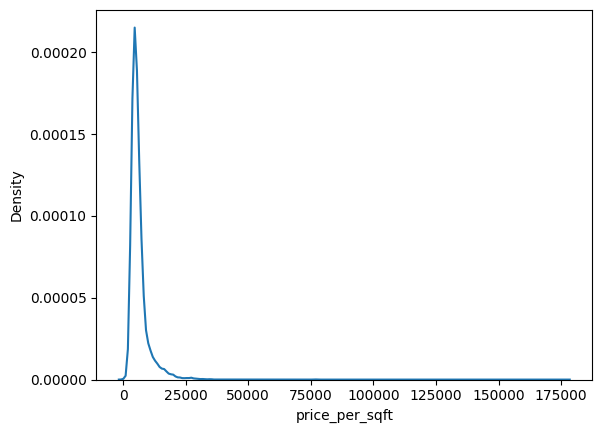

In [91]:
sns.kdeplot(df6['price_per_sqft'])

<AxesSubplot: xlabel='price_per_sqft'>

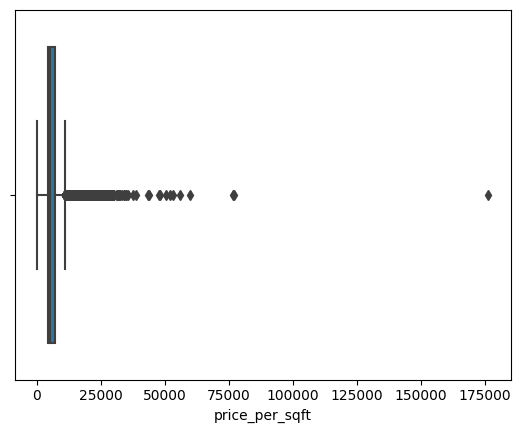

In [92]:
sns.boxplot(x = df6['price_per_sqft'])

In [93]:
indexx = df.groupby('location').groups['1ST BLOCK JAYANAGAR']
df.loc[indexx]

,location,bhk,total_sqft,bath,price,price_per_sqft
210,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.0,15017.543860
848,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.0,11901.840491
1162,1ST BLOCK JAYANAGAR,6,1200.0,6.0,125.0,10416.666667
2152,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.0,12533.333333
2355,1ST BLOCK JAYANAGAR,4,2400.0,4.0,450.0,18750.000000
4991,1ST BLOCK JAYANAGAR,2,1000.0,3.0,60.0,6000.000000
5115,1ST BLOCK JAYANAGAR,7,930.0,4.0,85.0,9139.784946
6168,1ST BLOCK JAYANAGAR,8,700.0,4.0,104.0,14857.142857
7138,1ST BLOCK JAYANAGAR,3,1200.0,2.0,130.0,10833.333333
7358,1ST BLOCK JAYANAGAR,2,1235.0,2.0,148.0,11983.805668


In [94]:
## Removing Outliers on the basis of (mean + std) and (mean - std) of 'price_per_sqft'

In [95]:
df_out = pd.DataFrame()
for key, subdf in df6.groupby('location'):
    
    m = np.mean(subdf['price_per_sqft'])
    st = np.std(subdf['price_per_sqft'])
    
    loc_subdf = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']< (m+st))]
    df_out = pd.concat([df_out, loc_subdf], ignore_index=True)
    
df_out

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.00,15017.543860
1,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.00,11901.840491
2,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.00,12533.333333
3,1ST BLOCK JAYANAGAR,3,1200.0,2.0,130.00,10833.333333
4,1ST BLOCK JAYANAGAR,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
9806,YESHWANTHPUR,3,1676.0,3.0,92.13,5497.016706
9807,YESHWANTHPUR,3,2503.0,3.0,138.00,5513.383939
9808,YESHWANTHPUR,3,1855.0,3.0,135.00,7277.628032
9809,YESHWANTHPUR,3,1876.0,3.0,160.00,8528.784648


In [96]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return reduced_df
df11 = remove_pps_outliers(df6)
df11.shape

(68, 6)

In [97]:
## Removing Outliers on the basis of (mean + std) and (mean - std)

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9811, 6)

In [98]:
df7.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,9811.000000,9811.000000,9811.000000,9811.000000,9811.000000
mean,2.582408,1516.830475,2.489858,92.944198,5717.646428
std,0.910026,895.611194,1.003142,89.830933,2315.679810
min,1.000000,350.000000,1.000000,10.000000,1250.000000
25%,2.000000,1108.000000,2.000000,49.775000,4282.702302
50%,2.000000,1295.000000,2.000000,68.000000,5208.333333
75%,3.000000,1656.000000,3.000000,100.000000,6491.605694
max,16.000000,30400.000000,16.000000,2200.000000,24509.803922


In [99]:
################################################################################################################

In [100]:
## Removing Outliers on the basis of 'price_per_sqft' when for each location 
## price_per_sqft of 3bhk should be greater than mean(2bhk.price_per_sqft)
## for the correct calculations of mean minimum 5 values should be present

In [101]:
for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0] }
    print(location, bhk_stats)
    print()
    for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            print(location, bhk,stats)
            print()
    break

1ST BLOCK JAYANAGAR {2: {'mean': 8991.902834008097, 'std': 2991.9028340080968, 'count': 2}, 3: {'mean': 10450.649516638781, 'std': 2341.442149280999, 'count': 4}, 4: {'mean': 15951.533460274062, 'std': 1615.6957599256682, 'count': 4}, 6: {'mean': 10416.666666666666, 'std': 0.0, 'count': 1}, 7: {'mean': 9139.78494623656, 'std': 0.0, 'count': 1}, 8: {'mean': 8899.159663865546, 'std': 5957.983193277311, 'count': 2}}



In [102]:
exclude_indices = np.array([])

for loc, loc_df in df7.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in loc_df.groupby('bhk'):
        
        bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df['price_per_sqft']),
            'std'  : np.std (bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]  }
        
    for bhk, bhk_df in loc_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        
        if stats and stats['count']>5:
            exclude_indices = np.append( exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values )
        
df7.drop(index = exclude_indices)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.00,15017.543860
1,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.00,11901.840491
2,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.00,12533.333333
3,1ST BLOCK JAYANAGAR,3,1200.0,2.0,130.00,10833.333333
4,1ST BLOCK JAYANAGAR,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
9798,YESHWANTHPUR,1,672.0,1.0,36.85,5483.630952
9801,YESHWANTHPUR,3,1692.0,3.0,108.00,6382.978723
9803,YESHWANTHPUR,6,2500.0,5.0,185.00,7400.000000
9808,YESHWANTHPUR,3,1855.0,3.0,135.00,7277.628032


In [103]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]  }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.00,15017.543860
1,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.00,11901.840491
2,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.00,12533.333333
3,1ST BLOCK JAYANAGAR,3,1200.0,2.0,130.00,10833.333333
4,1ST BLOCK JAYANAGAR,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
9798,YESHWANTHPUR,1,672.0,1.0,36.85,5483.630952
9801,YESHWANTHPUR,3,1692.0,3.0,108.00,6382.978723
9803,YESHWANTHPUR,6,2500.0,5.0,185.00,7400.000000
9808,YESHWANTHPUR,3,1855.0,3.0,135.00,7277.628032


In [104]:
df9 = df8[df8.bath<df8.bhk+2]

In [105]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,location,bhk,total_sqft,bath,price
0,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.0
1,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.0
2,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.0


In [106]:
df10.to_csv(r'csv_files/cleaned_banglore_hpp.csv', index=False)

In [107]:
#############################################################################################################

##### Model2 Training

In [108]:
x = df10.drop('price', axis =1)
y = df10['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=900)

In [109]:
ohe = OneHotEncoder()
ohe.fit(df1[['location']])
# ohe.categories_

OneHotEncoder()

In [110]:
col_trans = ColumnTransformer(transformers=
            [('nominal', OneHotEncoder(categories=ohe.categories_, sparse=False, drop='if_binary'), ['location'])],
             remainder= 'passthrough')

In [111]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(col_trans, lin_reg)
lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[array(['1ST BLOCK JAYANAGAR', '1ST BLOCK KORAMANGALA',
       '1ST PHASE JP NAGAR', '2ND STAGE NAGARBHAVI',
       '5TH BLOCK HBR LAYOUT', '5TH PHASE JP NAGAR', '6TH PHASE JP NAGAR',
       '7TH PHASE JP NAGAR', '8TH PHASE JP NAGAR', '9TH PHASE JP NAGAR',
       'ABBIGERE', 'AECS LAYOUT...
       'THUBARAHALLI', 'THYAGARAJA NAGAR', 'TINDLU', 'TUMKUR ROAD',
       'ULSOOR', 'UTTARAHALLI', 'VARTHUR', 'VARTHUR ROAD', 'VASANTHAPURA',
       'VIDYARANYAPURA', 'VIJAYANAGAR', 'VISHVESHWARYA LAYOUT',
       'VISHWAPRIYA LAYOUT', 'VITTASANDRA', 'WHITEFIELD',
       'YELACHENAHALLI', 'YELAHANKA', 'YELAHANKA NEW TOWN', 'YELENAHALLI',
       'YESHWANTHPUR'], dtype=object)],
                                                                drop='if_binary',
                                                                sparse=False),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [112]:
lin_reg_pipe.score(x_train, y_train)

0.8598639994063312

In [113]:
lin_reg_pipe.score(x_test, y_test)

0.8513224467196767

In [114]:
pickle.dump(lin_reg_pipe, open(r'artifacts/linear_regression_model.pkl', 'wb'))

# Regularization

In [115]:
gscv_lasso = GridSearchCV(Lasso(), {'alpha' : np.arange(0.01,5,0.01)}, cv = 5, n_jobs = -1)
gscv_lasso.fit(col_trans.fit_transform(x_train),y_train)
lasso_pipe = make_pipeline(col_trans, Lasso(alpha = gscv_lasso.best_params_['alpha']))
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[array(['1ST BLOCK JAYANAGAR', '1ST BLOCK KORAMANGALA',
       '1ST PHASE JP NAGAR', '2ND STAGE NAGARBHAVI',
       '5TH BLOCK HBR LAYOUT', '5TH PHASE JP NAGAR', '6TH PHASE JP NAGAR',
       '7TH PHASE JP NAGAR', '8TH PHASE JP NAGAR', '9TH PHASE JP NAGAR',
       'ABBIGERE', 'AECS LAYOUT...
       'THUBARAHALLI', 'THYAGARAJA NAGAR', 'TINDLU', 'TUMKUR ROAD',
       'ULSOOR', 'UTTARAHALLI', 'VARTHUR', 'VARTHUR ROAD', 'VASANTHAPURA',
       'VIDYARANYAPURA', 'VIJAYANAGAR', 'VISHVESHWARYA LAYOUT',
       'VISHWAPRIYA LAYOUT', 'VITTASANDRA', 'WHITEFIELD',
       'YELACHENAHALLI', 'YELAHANKA', 'YELAHANKA NEW TOWN', 'YELENAHALLI',
       'YESHWANTHPUR'], dtype=object)],
                                                                drop='if_binary',
                                                                sparse=False),
                                                  ['location'])])),
                ('lasso', Lasso(alpha=0.01))])

In [116]:
lasso_pipe.score(x_train, y_train)

0.8586003687951702

In [117]:
lasso_pipe.score(x_test, y_test)

0.8523156190119542

In [118]:
gscv_ridge = GridSearchCV(Ridge(), {'alpha' : np.arange(0.01,5,0.01)}, cv = 5)
gscv_ridge.fit(col_trans.fit_transform(x_train),y_train)
ridge_pipe = make_pipeline(col_trans, Ridge(alpha = gscv_ridge.best_params_['alpha']))
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(categories=[array(['1ST BLOCK JAYANAGAR', '1ST BLOCK KORAMANGALA',
       '1ST PHASE JP NAGAR', '2ND STAGE NAGARBHAVI',
       '5TH BLOCK HBR LAYOUT', '5TH PHASE JP NAGAR', '6TH PHASE JP NAGAR',
       '7TH PHASE JP NAGAR', '8TH PHASE JP NAGAR', '9TH PHASE JP NAGAR',
       'ABBIGERE', 'AECS LAYOUT...
       'THUBARAHALLI', 'THYAGARAJA NAGAR', 'TINDLU', 'TUMKUR ROAD',
       'ULSOOR', 'UTTARAHALLI', 'VARTHUR', 'VARTHUR ROAD', 'VASANTHAPURA',
       'VIDYARANYAPURA', 'VIJAYANAGAR', 'VISHVESHWARYA LAYOUT',
       'VISHWAPRIYA LAYOUT', 'VITTASANDRA', 'WHITEFIELD',
       'YELACHENAHALLI', 'YELAHANKA', 'YELAHANKA NEW TOWN', 'YELENAHALLI',
       'YESHWANTHPUR'], dtype=object)],
                                                                drop='if_binary',
                                                                sparse=False),
                                                  ['location'])])),
                ('ridge', Ridge(alpha=0.68))])

In [119]:
ridge_pipe.score(x_train, y_train)

0.8587779857021824

In [120]:
ridge_pipe.score(x_test, y_test)

0.8585545837338155

In [121]:
pickle.dump(ridge_pipe, open(r'artifacts/ridge_regression_model.pkl', 'wb'))

In [122]:
location  =    '1ST BLOCK JAYANAGAR'
bhk        =                     3
total_sqft  =              1630
bath         =                 3

test_df= pd.DataFrame([[location, bhk, total_sqft, bath]], 
                      columns = ['location', 'bhk', 'total_sqft', 'bath'])

ridge_pipe.predict(test_df)[0]

219.79154540040918

In [123]:
lin_reg_pipe.predict(test_df)[0]

231.74369749551158

In [124]:
df10

,location,bhk,total_sqft,bath,price
0,1ST BLOCK JAYANAGAR,4,2850.0,4.0,428.00
1,1ST BLOCK JAYANAGAR,3,1630.0,3.0,194.00
2,1ST BLOCK JAYANAGAR,3,1875.0,2.0,235.00
3,1ST BLOCK JAYANAGAR,3,1200.0,2.0,130.00
4,1ST BLOCK JAYANAGAR,2,1235.0,2.0,148.00
...,...,...,...,...,...
9798,YESHWANTHPUR,1,672.0,1.0,36.85
9801,YESHWANTHPUR,3,1692.0,3.0,108.00
9803,YESHWANTHPUR,6,2500.0,5.0,185.00
9808,YESHWANTHPUR,3,1855.0,3.0,135.00


In [125]:
# Ridge is giving good accuracy